# Importing Python Packages

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loaded Dataset & Checking its information

In [2]:
# Import mexico covid 19 Data Set
df = pd.read_csv(r"\Users\khett\Desktop\mexico_covid19.csv")

In [3]:
df.columns #Show all the columns inside mexico dataset

Index(['Age', 'Sex', 'Pneumonia', 'Diabetes', 'Ashma', 'Hypertension', 'CVDs',
       'Obesity', 'CKDs', 'Tabacco', 'Result'],
      dtype='object')

In [4]:
df.info() #Show dta types of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Age           263007 non-null  float64
 1   Sex           263007 non-null  float64
 2   Pneumonia     263008 non-null  object 
 3   Diabetes      263007 non-null  float64
 4   Ashma         263007 non-null  float64
 5   Hypertension  263007 non-null  float64
 6   CVDs          263007 non-null  float64
 7   Obesity       263007 non-null  float64
 8   CKDs          263007 non-null  float64
 9   Tabacco       263007 non-null  float64
 10  Result        263007 non-null  float64
dtypes: float64(10), object(1)
memory usage: 88.0+ MB


# Cleaning Dataset

In [5]:
cols = ['Age','Sex', 'Pneumonia', 'Diabetes', 'Ashma', 'Hypertension', 'CVDs',
       'Obesity', 'CKDs', 'Tabacco', 'Result'] #Since the selected columns need to have 0 and 1 value 

In [6]:
df=df.dropna() #Dropped empty row

In [7]:
df[cols] = df[cols].astype('Int64')

In [8]:
df.shape

(263007, 11)

In [9]:
df.head(5)

,Age,Sex,Pneumonia,Diabetes,Ashma,Hypertension,CVDs,Obesity,CKDs,Tabacco,Result
0,74,0,0,1,0,1,0,1,0,0,0
1,71,1,0,1,0,1,0,1,0,1,0
2,50,0,1,0,0,0,0,0,0,0,1
3,25,1,0,0,0,0,0,1,0,0,1
4,28,1,0,0,0,0,0,0,0,0,0


In [10]:
df.describe()

,Age,Sex,Pneumonia,Diabetes,Ashma,Hypertension,CVDs,Obesity,CKDs,Tabacco,Result
count,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000,263007.000000
mean,42.591627,0.489318,0.167440,0.506025,0.380115,0.517705,0.383876,0.524830,0.370922,0.456129,0.390328
std,16.903824,0.499887,0.809845,6.065576,5.796225,5.844009,5.913592,5.917735,5.839516,5.978390,0.487825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120.000000,1.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263007 entries, 0 to 263006
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           263007 non-null  Int64
 1   Sex           263007 non-null  Int64
 2   Pneumonia     263007 non-null  Int64
 3   Diabetes      263007 non-null  Int64
 4   Ashma         263007 non-null  Int64
 5   Hypertension  263007 non-null  Int64
 6   CVDs          263007 non-null  Int64
 7   Obesity       263007 non-null  Int64
 8   CKDs          263007 non-null  Int64
 9   Tabacco       263007 non-null  Int64
 10  Result        263007 non-null  Int64
dtypes: Int64(11)
memory usage: 26.8 MB


In [12]:
df.Age.unique()

<IntegerArray>
[ 74,  71,  50,  25,  28,  67,  44,  62,  30,  32,
 ...
 120, 105, 103, 114, 108, 106, 111, 104, 118, 115]
Length: 117, dtype: Int64

In [13]:
pd.Series({c: df[c].unique() for c in df}) #Checking unique value in all the columns

Age             [74, 71, 50, 25, 28, 67, 44, 62, 30, 32, 53, 3...
Sex                                                        [0, 1]
Pneumonia                                              [0, 1, 99]
Diabetes                                               [1, 0, 98]
Ashma                                                  [0, 1, 98]
Hypertension                                           [1, 0, 98]
CVDs                                                   [0, 1, 98]
Obesity                                                [1, 0, 98]
CKDs                                                   [0, 1, 98]
Tabacco                                                [0, 1, 98]
Result                                                     [0, 1]
dtype: object

In [14]:
df = df.drop(df[df.Pneumonia > 2].index) #Dropping row which has value other than 1 & 0
df = df.drop(df[df.Diabetes > 2].index)
df = df.drop(df[df.Ashma > 2].index)
df = df.drop(df[df.Hypertension > 2].index)
df = df.drop(df[df.CVDs > 2].index)
df = df.drop(df[df.Obesity > 2].index)
df = df.drop(df[df.CKDs > 2].index)
df = df.drop(df[df.Tabacco > 2].index)

In [15]:
# all commlumns has been changed to integer and removed invalid values on specific columns
pd.Series({c: df[c].unique() for c in df}) 

Age             [74, 71, 50, 25, 28, 67, 44, 62, 30, 32, 53, 3...
Sex                                                        [0, 1]
Pneumonia                                                  [0, 1]
Diabetes                                                   [1, 0]
Ashma                                                      [0, 1]
Hypertension                                               [1, 0]
CVDs                                                       [0, 1]
Obesity                                                    [1, 0]
CKDs                                                       [0, 1]
Tabacco                                                    [0, 1]
Result                                                     [0, 1]
dtype: object

In [16]:
df["Result"].describe()

count    261409.000000
mean          0.389233
std           0.487577
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Result, dtype: float64

In [17]:
df["Result"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [18]:
print ("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (261409, 11)


In [19]:
(df[df.Age.isnull()]) #Checking if there is any null value

,Age,Sex,Pneumonia,Diabetes,Ashma,Hypertension,CVDs,Obesity,CKDs,Tabacco,Result


# Correlation Heat Map

<AxesSubplot:>

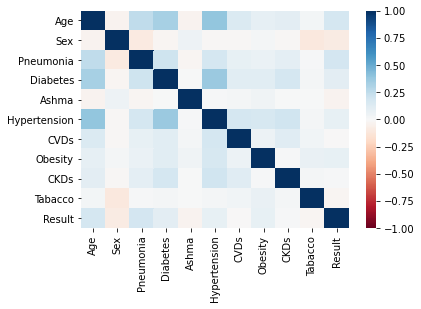

In [20]:
#Calculating pairwise correlation and using heatmap to present it.
corr = df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='RdBu')


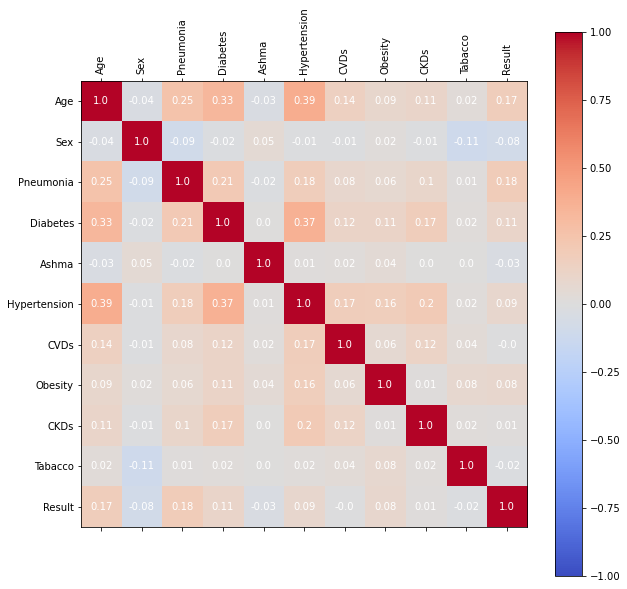

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(df.corr(),cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(11):
        text = ax.text(j, i, round(df.corr().iloc[i][j],2),
                       ha="center", va="center", color="w")
plt.show()

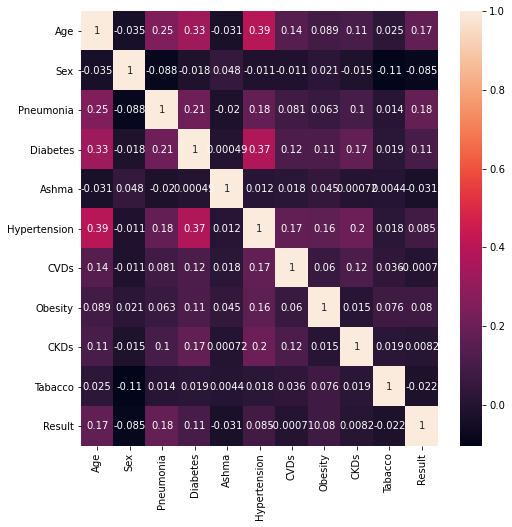

In [22]:
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [23]:
print(df.corr().nlargest(4, 'Result').index)

Index(['Result', 'Pneumonia', 'Age', 'Diabetes'], dtype='object')


In [24]:
print(df.corr().nlargest(4, 'Result').values[:,8])

[0.00819675 0.09992031 0.10831413 0.17487823]


# Exploratory Data Analysis (EDA)
First, analysing the Result variable:

0    159660
1    101749
Name: Result, dtype: Int64


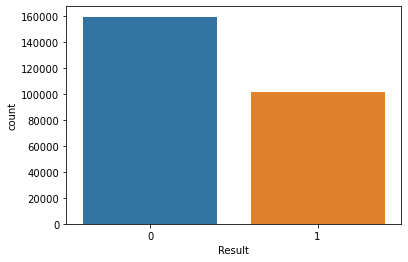

In [25]:
y = df["Result"]

sns.countplot(y)


Result_temp = df.Result.value_counts()

print(Result_temp)

<AxesSubplot:xlabel='Result', ylabel='Density'>

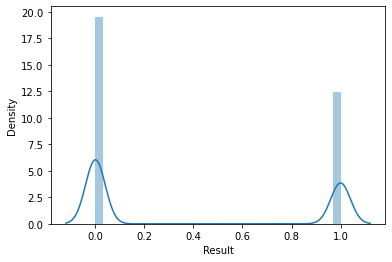

In [26]:
sns.distplot(df["Result"])

In [27]:
# Total result patient with positive and negative result
print("Percentage of patience with Negative Result: "+str(round(Result_temp[0]*100/263007,2)))
print("Percentage of patience with Positive Result: "+str(round(Result_temp[1]*100/263007,2)))


Percentage of patience with Negative Result: 60.71
Percentage of patience with Positive Result: 38.69


# We'll analyse 'sex', 'Pneumonia', 'Diabetes', 'Ashma', 'Hypertension', 'CVDs', 'Obesity', 'CKDs' and 'Tabacco' features
Analysing the 'Sex' feature:

In [28]:
df["Sex"].unique()


<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Sex', ylabel='Result'>

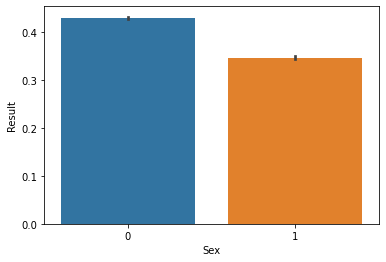

In [29]:
sns.barplot(df["Sex"],y)

##### We notice, that females are more likely to have more negative cases than males

# Analysing the 'Pneumonia' feature

In [30]:
df["Pneumonia"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Pneumonia', ylabel='Result'>

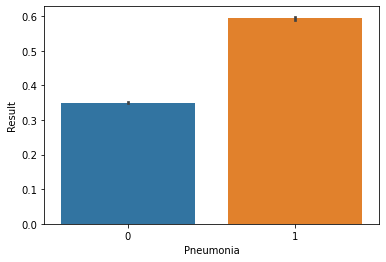

In [31]:
sns.barplot(df["Pneumonia"],y)

##### We notice, that Patients with Pneumonia have mostly Positive Result

# Analysing the 'Diabetes' feature

In [32]:
df["Diabetes"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Diabetes', ylabel='Result'>

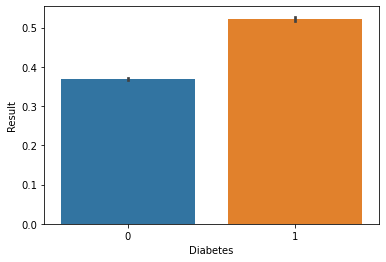

In [33]:
sns.barplot(df["Diabetes"],y)

##### We notice, that Patients with Diabetes have mostly Positive Result

# Analysing the 'Ashma' feature

##### We notice, that Patients with Diabetes have mostly Positive Result

In [34]:
df["Ashma"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Ashma', ylabel='Result'>

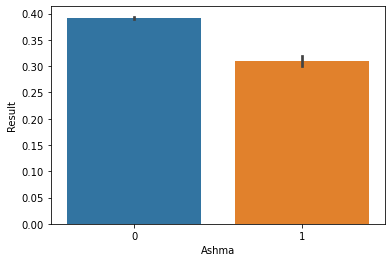

In [35]:
sns.barplot(df["Ashma"],y)

##### We notice, that Patients with Ashma have mostly Negative Result

# Analysing the 'Hypertension' feature

In [36]:
df["Hypertension"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Hypertension', ylabel='Result'>

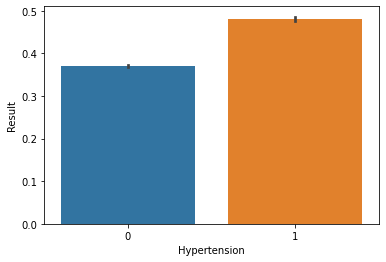

In [37]:
sns.barplot(df["Hypertension"],y)

##### We notice, that Patients with Hypertension have mostly Positive Result

# Analysing the 'CVDs' feature

In [38]:
df["CVDs"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='CVDs', ylabel='Result'>

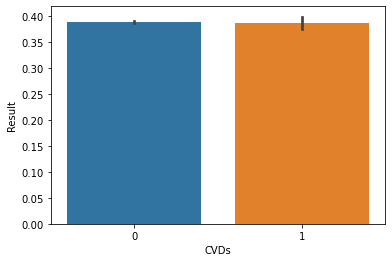

In [39]:
sns.barplot(df["CVDs"],y)

##### We notice, that Patients with CVDs have mostly Negative Result

# Analysing the 'Obesity' feature

In [40]:
df["Obesity"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Obesity', ylabel='Result'>

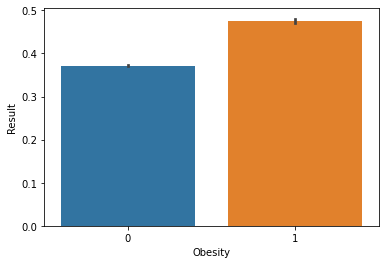

In [41]:
sns.barplot(df["Obesity"],y)

##### We notice, that Patients with Obesity have mostly Positive Result

# Analysing the 'CKDs' feature

In [42]:
df["CKDs"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='CKDs', ylabel='Result'>

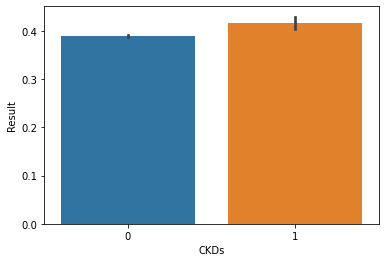

In [43]:
sns.barplot(df["CKDs"],y)

##### We notice, that Patients with CKDs have mostly Positive Result

# Analysing the 'Tabacco' feature

In [44]:
df["Tabacco"].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

<AxesSubplot:xlabel='Tabacco', ylabel='Result'>

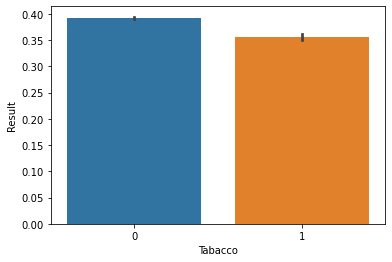

In [45]:
sns.barplot(df["Tabacco"],y)

##### We notice, that Patients with Tabacco have mostly Positive Result

# Data Processing 

In [46]:
selected_cols = ['Age', 'Pneumonia', 'Diabetes', 'Result']

In [47]:
df = df[selected_cols] 

In [48]:
dataset = pd.get_dummies(df, columns = ['Pneumonia', 'Diabetes'])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Age']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [50]:
dataset.columns

Index(['Age', 'Result', 'Pneumonia_0', 'Pneumonia_1', 'Diabetes_0',
       'Diabetes_1'],
      dtype='object')

In [51]:
dataset['Result'] = pd.get_dummies(df['Result'], drop_first=True)

In [52]:
dataset


,Age,Result,Pneumonia_0,Pneumonia_1,Diabetes_0,Diabetes_1
0,1.861446,0,1,0,0,1
1,1.683874,0,1,0,0,1
2,0.440873,1,0,1,1,0
3,-1.038890,1,1,0,1,0
4,-0.861319,0,1,0,1,0
...,...,...,...,...,...,...
263002,-0.210223,1,1,0,1,0
263003,0.618445,1,0,1,0,1
263004,1.328731,1,1,0,0,1
263005,1.683874,1,0,1,1,0


In [53]:
dataset['Result'].value_counts()

0    159660
1    101749
Name: Result, dtype: int64

In [54]:
dataset['Result'].nunique()

2

# Train Test Split and Model Fitting 

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = dataset.drop(['Result'], axis = 1)
Y = dataset['Result']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [57]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [58]:
X_train.shape

(182986, 5)

In [59]:
X_test.shape

(78423, 5)

In [60]:
Y_train.shape

(182986,)

In [61]:
Y_test.shape

(78423,)

In [62]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

In [64]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)

In [65]:
Y_pred_lr.shape

(78423,)

In [66]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 64.06 %


In [67]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score
cm = confusion_matrix(Y_test, Y_pred_lr)
report = classification_report(Y_test, Y_pred_lr)
print(cm)
print(report)

[[42601  5103]
 [23079  7640]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.60      0.25      0.35     30719

    accuracy                           0.64     78423
   macro avg       0.62      0.57      0.55     78423
weighted avg       0.63      0.64      0.59     78423



In [68]:
print("Precision Score : ",precision_score(Y_test,Y_pred_lr, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6406411384415286


In [69]:
print("Recall Score : ",recall_score(Y_test,Y_pred_lr, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6406411384415286


In [70]:
print(f1_score(Y_test,Y_pred_lr,average='micro'))

0.6406411384415286


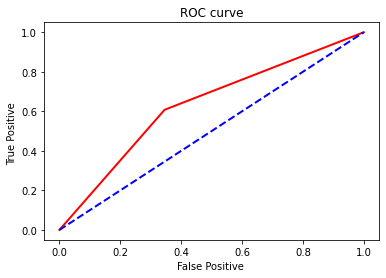

In [71]:
###Roc curve
fpr, tpr,_=roc_curve(lr.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [72]:
roc_auc_score(lr.predict(X_train),Y_train)

0.6310971529588432

# K nearest neighbors (kNN)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [74]:
Y_pred_knn.shape

(78423,)

In [75]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 58.19 %


In [76]:
cm = confusion_matrix(Y_test, Y_pred_knn)
report = classification_report(Y_test, Y_pred_knn)
print(cm)
print(report)

[[32537 15167]
 [17621 13098]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66     47704
           1       0.46      0.43      0.44     30719

    accuracy                           0.58     78423
   macro avg       0.56      0.55      0.55     78423
weighted avg       0.58      0.58      0.58     78423



In [77]:
print("Precision Score : ",precision_score(Y_test,Y_pred_knn, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.5819083687183607


In [78]:
print("Recall Score : ",recall_score(Y_test,Y_pred_knn, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.5819083687183607


In [79]:
print(f1_score(Y_test,Y_pred_knn,average='micro'))

0.5819083687183607


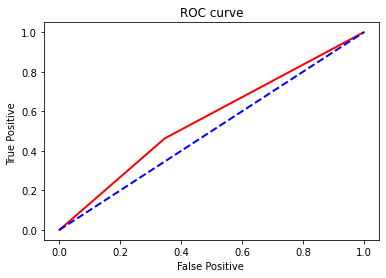

In [80]:
###Roc curve
fpr, tpr,_=roc_curve(knn.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [81]:
roc_auc_score(knn.predict(X_train),Y_train)

0.5584091023680574

# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [83]:
Y_pred_nb.shape

(78423,)

In [84]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 63.1 %


In [85]:
cm = confusion_matrix(Y_test, Y_pred_nb)
report = classification_report(Y_test, Y_pred_nb)
print(cm)
print(report)

[[38989  8715]
 [20225 10494]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     47704
           1       0.55      0.34      0.42     30719

    accuracy                           0.63     78423
   macro avg       0.60      0.58      0.57     78423
weighted avg       0.61      0.63      0.61     78423



In [86]:
print("Precision Score : ",precision_score(Y_test,Y_pred_nb, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6309756066460095


In [87]:
print("Recall Score : ",recall_score(Y_test,Y_pred_nb, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6309756066460095


In [88]:
print(f1_score(Y_test,Y_pred_nb,average='micro'))

0.6309756066460095


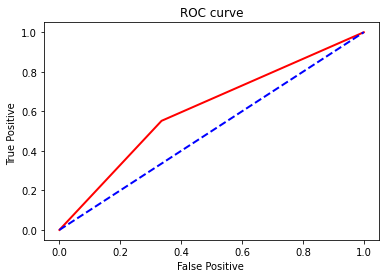

In [89]:
###Roc curve
fpr, tpr,_=roc_curve(nb.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [90]:
roc_auc_score(nb.predict(X_train),Y_train)

0.6081543284785879

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [92]:
print(Y_pred_dt.shape)

(78423,)


In [93]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 64.35 %


In [94]:
cm = confusion_matrix(Y_test, Y_pred_dt)
report = classification_report(Y_test, Y_pred_dt)
print(cm)
print(report)

[[42662  5042]
 [22912  7807]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.61      0.25      0.36     30719

    accuracy                           0.64     78423
   macro avg       0.63      0.57      0.56     78423
weighted avg       0.63      0.64      0.60     78423



In [95]:
print("Precision Score : ",precision_score(Y_test,Y_pred_dt, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6435484487969091


In [96]:
print("Recall Score : ",recall_score(Y_test,Y_pred_dt, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6435484487969091


In [97]:
print(f1_score(Y_test,Y_pred_dt,average='micro'))

0.6435484487969091


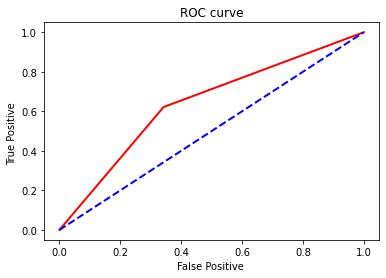

In [98]:
###Roc curve
fpr, tpr,_=roc_curve(dt.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [99]:
roc_auc_score(dt.predict(X_train),Y_train)

0.6396683010217996

# Random Forest

The accuracy score achieved using Random Forest is: 64.36%


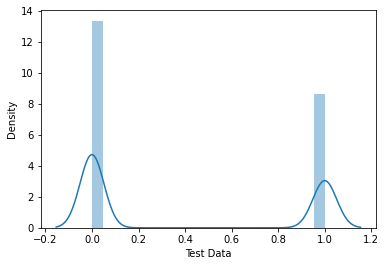

In [100]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest =  RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
randomforest.fit(X_train, Y_train)
x = pd.Series(Y_test, name="Test Data")
ax = sns.distplot(x)
Y_pred_rf = randomforest.predict(X_test)
acc_logreg_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
print("The accuracy score achieved using Random Forest is: " +str(acc_logreg_rf)+ "%")

In [101]:
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
R_forest= ensemble.RandomForestClassifier(n_estimators=300, max_features=4, max_depth=10)
R_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features=4, n_estimators=300)

In [102]:
# Accuracy on train data 
forest_predict1=R_forest.predict(X_train)
cm1 = confusion_matrix(Y_train, forest_predict1)
accuracy_train=(cm1[0,0]+cm1[1,1])/sum(sum(cm1))
print("Random Forest Accuracy on Train data = ", round(accuracy_train,2))

Random Forest Accuracy on Train data =  0.65


In [103]:
# Accuracy on test data 
forest_predict2=R_forest.predict(X_test)
cm2 = confusion_matrix(Y_test, forest_predict2)
accuracy_test=(cm2[0,0]+cm2[1,1])/sum(sum(cm2))
print("Random Forest Accuracy on Test data = ", round(accuracy_test,2))

Random Forest Accuracy on Test data =  0.64


In [104]:
cm = confusion_matrix(Y_test, Y_pred_rf)
report = classification_report(Y_test, Y_pred_rf)
print(cm)
print(report)

[[42556  5148]
 [22800  7919]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.61      0.26      0.36     30719

    accuracy                           0.64     78423
   macro avg       0.63      0.57      0.56     78423
weighted avg       0.63      0.64      0.60     78423



In [105]:
print("Precision Score : ",precision_score(Y_test,Y_pred_rf, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6436249569641559


In [106]:
print("Recall Score : ",recall_score(Y_test,Y_pred_rf, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6436249569641559


In [107]:
print(f1_score(Y_test,Y_pred_rf,average='micro'))

0.6436249569641559


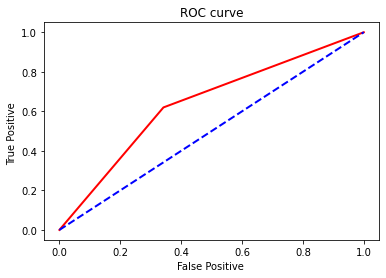

In [108]:
###Roc curve
fpr, tpr,_=roc_curve(randomforest.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [109]:
roc_auc_score(randomforest.predict(X_train),Y_train)

0.6389343344122194

# SVM (support-vector machines)

The accuracy score achieved using SVM is: 64.1%


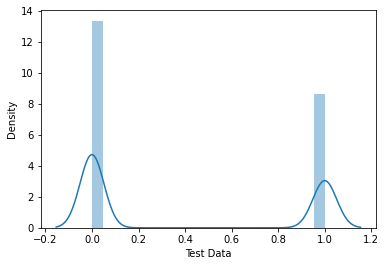

In [110]:
#Linear SVC
from sklearn import svm
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
x = pd.Series(Y_test, name="Test Data")
ax = sns.distplot(x)
Y_pred_svm = linear_svc.predict(X_test)
acc_logreg_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)
print("The accuracy score achieved using SVM is: " +str(acc_logreg_svm)+ "%")

In [111]:
cm = confusion_matrix(Y_test, Y_pred_svm)
report = classification_report(Y_test, Y_pred_svm)
print(cm)
print(report)

[[42633  5071]
 [23082  7637]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.60      0.25      0.35     30719

    accuracy                           0.64     78423
   macro avg       0.62      0.57      0.55     78423
weighted avg       0.63      0.64      0.60     78423



In [112]:
print("Precision Score : ",precision_score(Y_test,Y_pred_svm, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6410109279165551


In [113]:
print("Recall Score : ",recall_score(Y_test,Y_pred_svm, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6410109279165551


In [114]:
print(f1_score(Y_test,Y_pred_svm,average='micro'))

0.6410109279165551


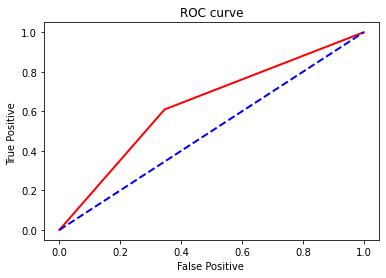

In [115]:
###Roc curve
fpr, tpr,_=roc_curve(linear_svc.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

In [116]:
roc_auc_score(linear_svc.predict(X_train),Y_train)

0.63193110529954

# Neural Network using Multilayer Perceptron 

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [118]:
model = Sequential()
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=5))

# Add the second hidden layer
model.add(Dense(16, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))


In [119]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
# Model Compilation 

model.compile(optimizer='adam',
       loss='binary_crossentropy',
       metrics=['accuracy'])

In [121]:
# Train the model for 10 epochs

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6377 - accuracy: 0.6481
Epoch 2/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6369 - accuracy: 0.6493
Epoch 3/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6366 - accuracy: 0.6492
Epoch 4/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6366 - accuracy: 0.6495
Epoch 5/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6364 - accuracy: 0.6500
Epoch 6/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6363 - accuracy: 0.6500
Epoch 7/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6363 - accuracy: 0.6501
Epoch 8/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6363 - accuracy: 0.6497
Epoch 9/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.6363 - accuracy: 0.6497
Epoch 10/10
5719/5719 [==============================] - 7s 1ms/step - loss: 0.636

In [122]:
# Testing accuracy

scores_nn_train = model.evaluate(X_train, Y_train)
print("Training Accuracy: %.2f%%\n" % (scores_nn_train[1]*100))

scores_nn_test = model.evaluate(X_test, Y_test)
print("Testing Accuracy: %.2f%% \n" % (scores_nn_test[1]*100))

5719/5719 [==============================] - 6s 1ms/step - loss: 0.6361 - accuracy: 0.6502
Training Accuracy: 65.02%

2451/2451 [==============================] - 3s 1ms/step - loss: 0.6397 - accuracy: 0.6433: 0s - loss: 0.6394 
Testing Accuracy: 64.33% 



In [123]:
Y_pred_nn = model.predict(X_test)

In [124]:
Y_pred_nn.shape


(78423, 1)

In [125]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [126]:
acc_logreg_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)
print("The accuracy score achieved using Neural Network is: " +str(acc_logreg_nn)+ "%")

The accuracy score achieved using Neural Network is: 64.33%


Text(33.0, 0.5, 'Actual')

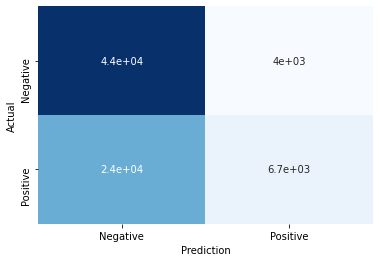

In [127]:
# Confusion matrix

Y_test_pred = (model.predict(X_test) > 0.5).astype("int8")
c_matrix = confusion_matrix(Y_test, Y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['Negative', 'Positive'],
                 yticklabels=['Negative', 'Positive'],
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [128]:
cm = confusion_matrix(Y_test, Y_pred_nn)
report = classification_report(Y_test, Y_pred_nn)
print(cm)
print(report)

[[43737  3967]
 [24010  6709]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     47704
           1       0.63      0.22      0.32     30719

    accuracy                           0.64     78423
   macro avg       0.64      0.57      0.54     78423
weighted avg       0.64      0.64      0.59     78423



In [129]:
print("Precision Score : ",precision_score(Y_test,Y_pred_nn, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.6432551674891295


In [130]:
print("Recall Score : ",recall_score(Y_test,Y_pred_nn, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.6432551674891295


In [131]:
print(f1_score(Y_test,Y_pred_nn,average='micro'))

0.6432551674891295


Text(0, 0.5, 'True Positive Rate')

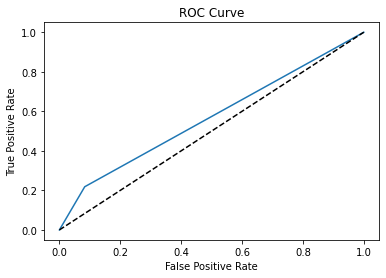

In [132]:

Y_test_pred_probs= (model.predict(X_test) > 0.5).astype("int32")

FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [133]:
roc_auc_score(model.predict(X_test) > 0.5,Y_test)

0.6370060231369171

# Output final score of every Model

In [134]:
scores = [score_lr,score_knn,score_nb,score_dt,acc_logreg_rf,acc_logreg_svm,acc_logreg_nn]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Naive Bayes","Decision Tree","Random Forest","Support Vector Machine","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 64.06 %
The accuracy score achieved using K-Nearest Neighbors is: 58.19 %
The accuracy score achieved using Naive Bayes is: 63.1 %
The accuracy score achieved using Decision Tree is: 64.35 %
The accuracy score achieved using Random Forest is: 64.36 %
The accuracy score achieved using Support Vector Machine is: 64.1 %
The accuracy score achieved using Neural Network is: 64.33 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

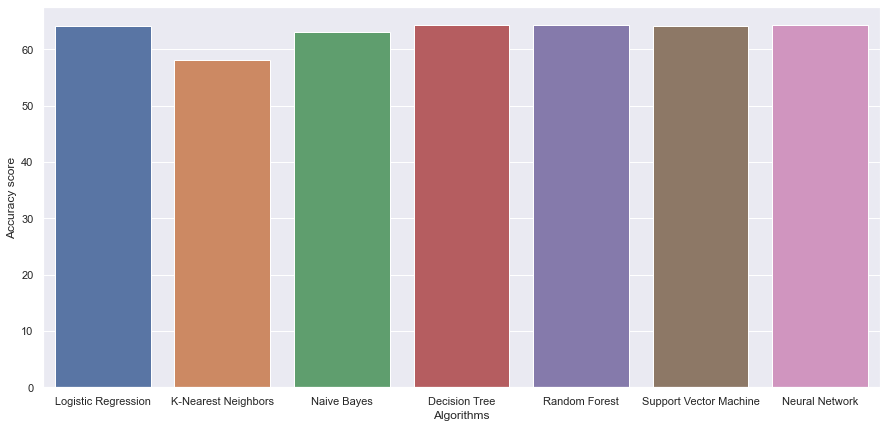

In [135]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

##### Random Forest has the best result compare to other algorithims. 